<a href="https://colab.research.google.com/github/koushik1234/machine_learning/blob/master/Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import cv2
import glob
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop


In [0]:
from google.colab import files
uploaded=files.upload()

In [108]:
uploaded=files.upload()

Saving m.zip to m.zip


In [130]:
!unzip k.zip

Archive:  k.zip
replace k/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: k/1.png                 
 extracting: k/3.png                 
 extracting: k/4.png                 
 extracting: k/5.png                 


In [131]:
!unzip m.zip

Archive:  m.zip
replace m/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: m/1.png                 
 extracting: m/3.png                 
 extracting: m/4.png                 
 extracting: m/5.png                 


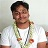

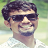

In [132]:
from IPython.display import Image, display
display(Image('k/1.png'))
display(Image('m/3.png'))

In [0]:
label=[]
def read_img(img_list, img):
  for i in range(len(img)):

    if 'k' in img[i]:
      pixel=cv2.imread(img[i] )
      pixel=cv2.cvtColor(pixel, cv2.COLOR_BGR2GRAY)
      pixel=np.asarray(pixel,dtype='float32')
      img_list.append(pixel)
      label.append('koushik')
    elif 'm' in img[i]:
      pixel=cv2.imread(img[i])
      pixel=cv2.cvtColor(pixel, cv2.COLOR_BGR2GRAY)
      pixel=np.asarray(pixel,dtype='float32')
      img_list.append(pixel)
      label.append('mukit')
  return img_list

path1 = glob.glob("k/*.png") #or jpg
path2 = glob.glob("m/*.png") #or jpg
list_ = []
m_image=read_img([],path2)
k_image=read_img([],path1)

In [0]:
k_image=np.array(k_image,dtype='float32')
m_image=np.array(m_image,dtype='float32')

In [0]:
#normalize the image range 0-1
k_image /= 255 
m_image /= 255

In [136]:
label

['mukit',
 'mukit',
 'mukit',
 'mukit',
 'koushik',
 'koushik',
 'koushik',
 'koushik']

In [137]:
k_image[1]

array([[0.9529412 , 0.9529412 , 0.95686275, ..., 0.8980392 , 0.90588236,
        0.90588236],
       [0.9647059 , 0.96862745, 0.9529412 , ..., 0.91764706, 0.91764706,
        0.92156863],
       [0.64705884, 0.7882353 , 0.9137255 , ..., 0.92156863, 0.9254902 ,
        0.92941177],
       ...,
       [0.5372549 , 0.5529412 , 0.5882353 , ..., 0.49411765, 0.6509804 ,
        0.63529414],
       [0.5568628 , 0.5529412 , 0.5686275 , ..., 0.5921569 , 0.6666667 ,
        0.70980394],
       [0.5529412 , 0.5176471 , 0.5137255 , ..., 0.5411765 , 0.6392157 ,
        0.73333335]], dtype=float32)

In [0]:
k_image = k_image.reshape(k_image.shape[0], 48, 48, 1)
k_image = k_image.astype('float32')